Group 3

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

import scipy
from scipy.stats import spearmanr
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale

from sklearn.linear_model import LogisticRegression
import xgboost

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport


In [0]:
url='https://github.com/yuenwong2sps/Data620/raw/master/assignment_spam_classifier/spambase_test/spambase.data'
raw=pd.read_csv(url)


In [0]:
url_header='https://raw.githubusercontent.com/yuenwong2sps/Data620/master/assignment_spam_classifier/columnHeaders.csv'
data_header=pd.read_csv(url_header)

In [0]:
raw.columns = data_header.columns


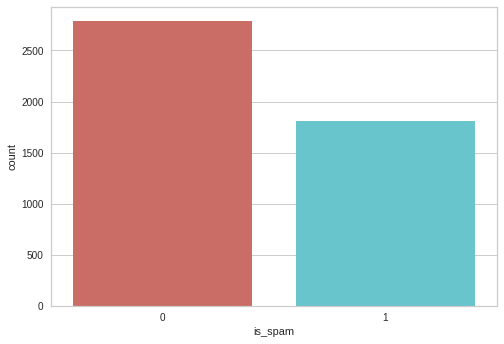

In [7]:
sb.countplot(x='is_spam',data=raw, palette = 'hls')


Ratio of spam and non-spam

In [18]:
spam_ratio = round(len(raw[raw['is_spam']==1])/raw.shape[0],2)
print("the spam message ratio in the given dataset is " + str(spam_ratio))

the spam message ratio in the given dataset is 0.39


Check data shape

In [27]:


from sklearn.model_selection import train_test_split

train, test = train_test_split(raw, test_size=spam_ratio)


from sklearn.model_selection import train_test_split

# Create a data with all columns except is_spam
raw_x = raw.drop("is_spam", axis=1)

# Create a is_spam labels dataset
raw_y = raw[["is_spam"]]

# Use stratified sampling to split up the dataset according to the raw_y dataset
# by default data will be split in 75% into train set and 25% into test set
# spam vs non_spam is 1812 : 2788, nearly close to ratio 40% vs 60% 
# to use stratify sampling method to due with the unbalnace data set

X_train, X_test, y_train, y_test = train_test_split(raw_x, raw_y, stratify=raw_y)

# Print out the category_desc counts on the training y labels
print(y_train["is_spam"].value_counts())



0    2091
1    1359
Name: is_spam, dtype: int64


In [29]:
#set scales
X_train_scale=scale(X_train)
X_test_scale=scale(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


**Logistric Regression**

In [30]:

LogReg = LogisticRegression()
LogRegmodel = ClassificationReport(LogReg, classes=["non_spam","is_spam"], support=True)
LogRegmodel.fit(X_train_scale, y_train)  # Fit the visualizer and the model
LogRegpreds=LogRegmodel.predict(X_test_scale)

LogRegcm = metrics.confusion_matrix(y_test,LogRegpreds)
print(LogRegcm)  

[[652  45]
 [ 58 395]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


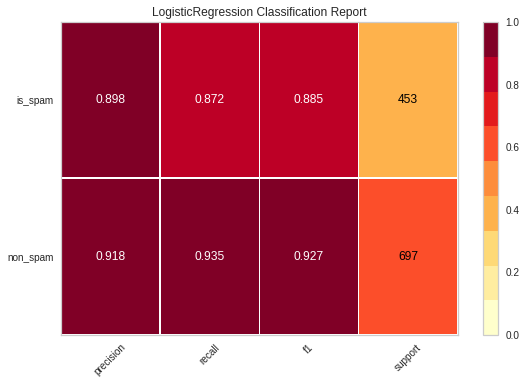

In [31]:
LogRegmodel.score(X_test_scale, y_test)  # Evaluate the model on the test data
g = LogRegmodel.poof()    

**XGB Classifier**

In [33]:
from xgboost import XGBClassifier
XGboost= XGBClassifier()


XGbmodel = ClassificationReport(XGboost, classes=["non_spam","is_spam"], support=True)

XGbmodel.fit(X_train_scale, y_train)  # Fit the visualizer and the model

XGbpeds=XGbmodel.predict(X_test_scale)

XGbcm = metrics.confusion_matrix(y_test,XGbpeds)
print(XGbcm) 


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[660  37]
 [ 39 414]]


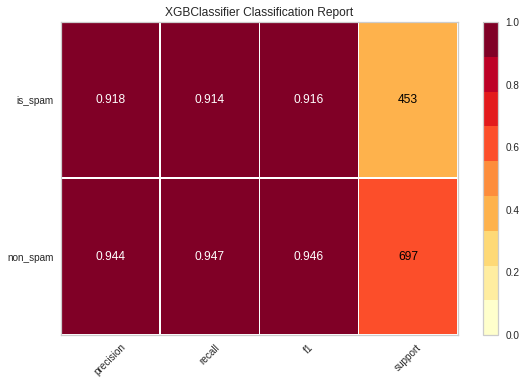

In [34]:
XGbmodel.score(X_test_scale, y_test)  # Evaluate the model on the test data
g = XGbmodel.poof()  

Conclusion:
We believe XGB classifer produces better result.  More improvement can be done by reducing unused columns or more feature engineering.

Reference

https://video.search.yahoo.com/search/video?fr=mcafee&p=how+to+implement+logistic+regression+in+python#id=6&vid=0f274214b516e1e979961c642d143363&action=view

https://github.com/WillKoehrsen/Data-Analysis/blob/master/bayesian_lr/Bayesian%20Linear%20Regression%20Project.ipynb

https://towardsdatascience.com/bayesian-linear-regression-in-python-using-machine-learning-to-predict-student-grades-part-2-b72059a8ac7e

https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html

